# About Dataset

This dataset is a synthetic version inspired by the original Credit Risk dataset on Kaggle and enriched with additional variables based on Financial Risk for Loan Approval data. SMOTENC was used to simulate new data points to enlarge the instances. The dataset is structured for both categorical and continuous features.

The dataset contains 45,000 records and 14 variables.

| Column                                  | Description                                               | Type             |
|-----------------------------------------|-----------------------------------------------------------|------------------|
| person_age                              | Age of the person                                         | Float            |
| person_gender                           | Gender of the person                                      | Categorical      |
| person_education                        | Highest education level                                   | Categorical      |
| person_income                           | Annual income                                             | Float            |
| person_emp_exp                          | Years of employment experience                           | Integer          |
| person_home_ownership                   | Home ownership status (e.g., rent, own, mortgage)        | Categorical      |
| loan_amnt                               | Loan amount requested                                     | Float            |
| loan_intent                             | Purpose of the loan                                       | Categorical      |
| loan_int_rate                           | Loan interest rate                                        | Float            |
| loan_percent_income                     | Loan amount as a percentage of annual income             | Float            |
| cb_person_cred_hist_length              | Length of credit history in years                        | Float            |
| credit_score                            | Credit score of the person                               | Integer          |
| previous_loan_defaults_on_file          | Indicator of previous loan defaults                      | Categorical      |
| loan_status (target variable)           | Loan approval status: 1 = approved; 0 = rejected         | Integer          |


# Project

In [1]:
# =============================
# 1. Import Libraries
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import Dataset

In [3]:

# =============================
# 2. Load Dataset
# =============================
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/loan_data.csv')

# Display the first 5 rows
display(df.head())

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1



Missing Values:
 person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


/tmp/ipython-input-474951307.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette="Set2")


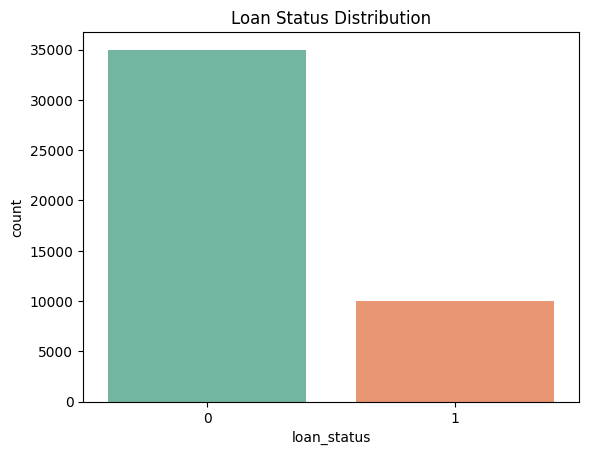

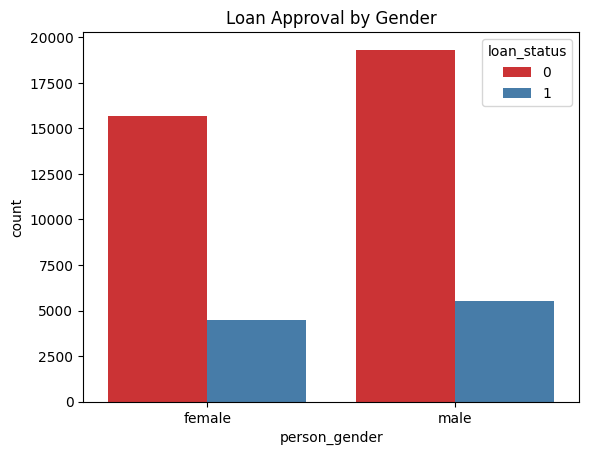

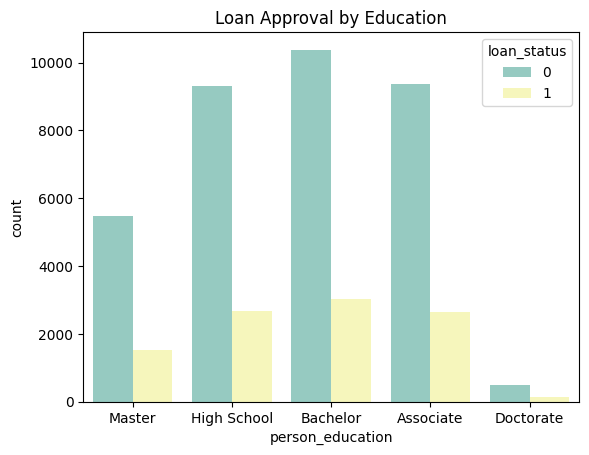

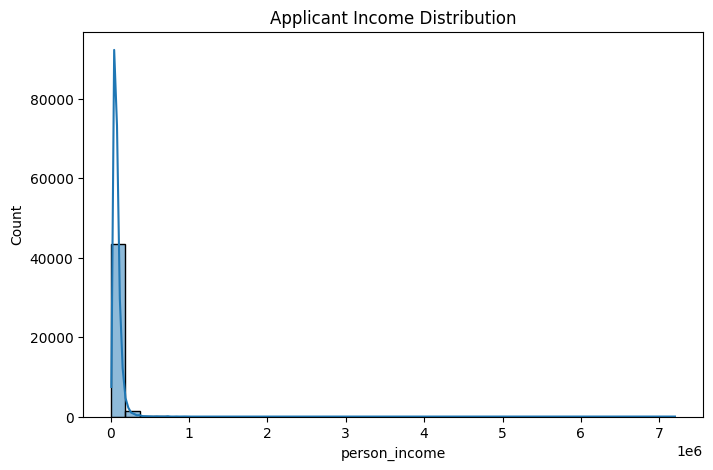

/tmp/ipython-input-474951307.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='person_income', data=df, palette="coolwarm")


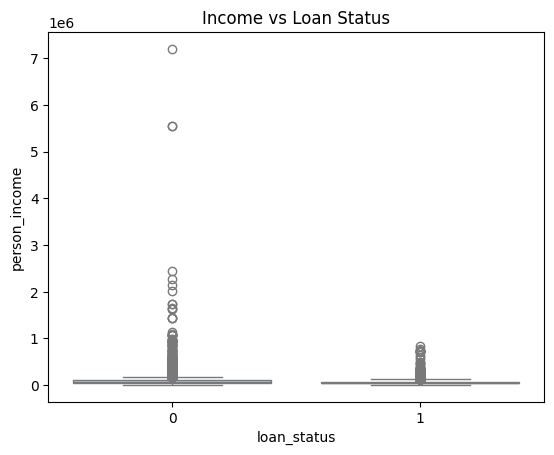

In [7]:
# =============================
# 3. Exploratory Data Analysis
# =============================

# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Target distribution
sns.countplot(x='loan_status', data=df, palette="Set2")
plt.title("Loan Status Distribution")
plt.show()

# Gender vs Loan Status
sns.countplot(x='person_gender', hue='loan_status', data=df, palette="Set1")
plt.title("Loan Approval by Gender")
plt.show()

# Education vs Loan Status
sns.countplot(x='person_education', hue='loan_status', data=df, palette="Set3")
plt.title("Loan Approval by Education")
plt.show()

# Applicant Income distribution
plt.figure(figsize=(8,5))
sns.histplot(df['person_income'], bins=40, kde=True)
plt.title("Applicant Income Distribution")
plt.show()

# Boxplot of Income vs Loan Status
sns.boxplot(x='loan_status', y='person_income', data=df, palette="coolwarm")
plt.title("Income vs Loan Status")
plt.show()

In [10]:

# =============================
# 4. Data Preprocessing
# =============================

# Drop Loan_ID if present
if 'Loan_ID' in df.columns:
    df.drop('Loan_ID', axis=1, inplace=True)

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Scale numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

/tmp/ipython-input-3460129514.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [11]:
# =============================
# 5. Train-Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# =============================
# 6. Logistic Regression Model
# =============================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


Accuracy: 0.8901111111111111

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.77      0.73      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.84      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000



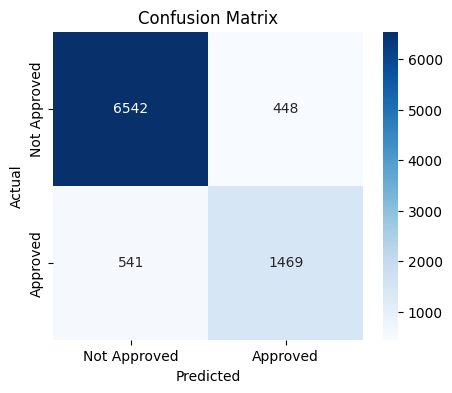

In [18]:

# =============================
# 7. Evaluation
# =============================
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=["Not Approved","Approved"], yticklabels=["Not Approved","Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [26]:
import random

# take 5 random samples from test set
sample_indices = random.sample(range(len(X_test)), 5)

for i in sample_indices:
    row = X_test.iloc[i]

    print("="*80)
    print("Applicant Details:")
    print(f"  Age                  : {row['person_age']}")
    print(f"  Gender               : {row['person_gender']}")
    print(f"  Education            : {row['person_education']}")
    print(f"  Income               : {row['person_income']}")
    print(f"  Employment Exp (yrs) : {row['person_emp_exp']}")
    print(f"  Home Ownership       : {row['person_home_ownership']}")
    print(f"  Loan Amount          : {row['loan_amnt']}")
    print(f"  Loan Intent          : {row['loan_intent']}")
    print(f"  Interest Rate (%)    : {row['loan_int_rate']}")
    print(f"  Loan % of Income     : {row['loan_percent_income']}")
    print(f"  Credit History (yrs) : {row['cb_person_cred_hist_length']}")
    print(f"  Credit Score         : {row['credit_score']}")
    print(f"  Previous Defaults    : {row['previous_loan_defaults_on_file']}")

    # actual + predicted labels
    actual = "Approved" if y_test.iloc[i] == 1 else "Not Approved"
    predicted = "Approved" if y_pred[i] == 1 else "Not Approved"

    print(f"\nActual Loan Status   : {actual}")
    print(f"Predicted Loan Status: {predicted}")


Applicant Details:
  Age                  : 26.0
  Gender               : 0.0
  Education            : 1.0
  Income               : 54950.0
  Employment Exp (yrs) : 7.0
  Home Ownership       : 3.0
  Loan Amount          : 10800.0
  Loan Intent          : 3.0
  Interest Rate (%)    : 6.17
  Loan % of Income     : 0.2
  Credit History (yrs) : 3.0
  Credit Score         : 702.0
  Previous Defaults    : 0.0

Actual Loan Status   : Not Approved
Predicted Loan Status: Not Approved
Applicant Details:
  Age                  : 23.0
  Gender               : 1.0
  Education            : 4.0
  Income               : 48901.0
  Employment Exp (yrs) : 3.0
  Home Ownership       : 3.0
  Loan Amount          : 1000.0
  Loan Intent          : 5.0
  Interest Rate (%)    : 10.62
  Loan % of Income     : 0.02
  Credit History (yrs) : 4.0
  Credit Score         : 670.0
  Previous Defaults    : 1.0

Actual Loan Status   : Not Approved
Predicted Loan Status: Not Approved
Applicant Details:
  Age             